In [8]:
import warnings
import numpy as np
import pandas as pd
import ptitprince as pt
import seaborn as sns
import xarray as xr
import tams
from scipy import stats
import matplotlib.pyplot as plt


In [2]:
warnings.filterwarnings("ignore", message="Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0.")

## Load data (Tb must be named 'ctt' and precip 'pr')

In [12]:
files = "/glade/scratch/rberrios/cpex-aw/2021082500/intrp_output/*valid_2021-08-25_*.nc"
ds = tams.load_mpas_precip(files).rename({"tb": "ctt", "precip": "pr"}).isel(time=slice(1,-1))
ds

<xarray.Dataset>
Dimensions:  (time: 22, lat: 600, lon: 1000)
Coordinates:
  * time     (time) datetime64[ns] 2021-08-25T01:00:00 ... 2021-08-25T22:00:00
  * lat      (lat) float32 -9.95 -9.85 -9.75 -9.65 ... 49.65 49.75 49.85 49.95
  * lon      (lon) float32 80.05 80.15 80.25 80.35 ... 179.6 179.7 179.9 179.9
Data variables:
    ctt      (time, lat, lon) float32 264.1 263.9 263.7 ... 253.4 253.0 252.6
    pr       (time, lat, lon) float32 0.1148 0.05461 0.05951 ... 0.1652 0.2101
Attributes:
    history_of_appended_files:  Mon May 16 11:44:26 2022: Appended file latlo...
    NCO:                        netCDF Operators version 5.0.3 (Homepage = ht...
    history:                    Mon May 16 11:44:28 2022: ncatted -a units,lo...

### Loading with MPAS example data

In [7]:
ds = tams.load_example_mpas().rename({"tb": "ctt", "precip": "pr"}).isel(time=slice(1, None))
ds

<xarray.Dataset>
Dimensions:  (time: 126, lon: 341, lat: 180)
Coordinates:
  * time     (time) datetime64[ns] 2006-09-08T13:00:00 ... 2006-09-13T18:00:00
  * lon      (lon) float64 85.0 85.25 85.5 85.75 ... 169.2 169.5 169.8 170.0
  * lat      (lat) float64 -4.875 -4.625 -4.375 -4.125 ... 39.38 39.62 39.88
Data variables:
    ctt      (time, lat, lon) float32 266.8 266.9 267.0 ... 266.0 265.9 265.7
    pr       (time, lat, lon) float32 ...

## Run TAMS

In [13]:
%%time

ce, mcs, mcs_summary = tams.run(ds, parallel=True)

Starting `identify`


[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done   1 out of   1 | elapsed:    0.6s remaining:    0.0s
[Parallel(n_jobs=-2)]: Done   2 out of   2 | elapsed:    1.3s remaining:    0.0s
[Parallel(n_jobs=-2)]: Done   3 out of   3 | elapsed:    2.2s remaining:    0.0s
[Parallel(n_jobs=-2)]: Done   4 out of   4 | elapsed:    3.2s remaining:    0.0s
[Parallel(n_jobs=-2)]: Done   5 out of   5 | elapsed:    4.1s remaining:    0.0s
[Parallel(n_jobs=-2)]: Done   6 out of   6 | elapsed:    5.1s remaining:    0.0s
[Parallel(n_jobs=-2)]: Done   7 out of   7 | elapsed:    6.1s remaining:    0.0s
[Parallel(n_jobs=-2)]: Done   8 out of   8 | elapsed:    7.1s remaining:    0.0s
[Parallel(n_jobs=-2)]: Done   9 out of   9 | elapsed:    8.1s remaining:    0.0s
[Parallel(n_jobs=-2)]: Done  22 out of  22 | elapsed:   19.7s finished


Starting `track`
Starting `classify`
Starting statistics calculations
Starting CE aggregation (into MCS time series)
Starting gridded data aggregation
Computing stats for MCS summary dataset
CPU times: user 1min 26s, sys: 2.34 s, total: 1min 28s
Wall time: 1min 34s


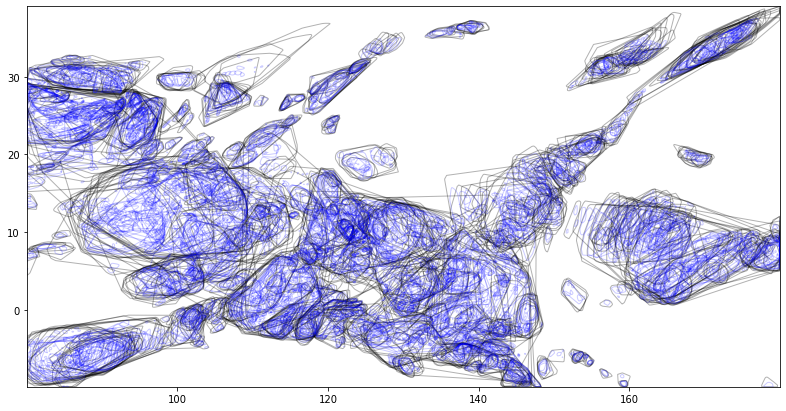

In [14]:
_, ax = plt.subplots(figsize=(15, 7))
ce.plot(fc="none", alpha=0.3, ax=ax)
ce.cs219.plot(fc="none", ec="b", alpha=0.2, ax=ax)
ax.autoscale(axis="both", tight=True)

In [5]:
ce

,cs235,area_km2,area219_km2,cs219,time,mcs_id,mcs_class
0,"POLYGON ((167.50000 9.49188, 167.75000 9.58423...",25634.1184,11798.035271,"MULTIPOLYGON (((167.50000 9.61125, 167.53439 9...",2006-09-08 13:00:00,0,DSL
1,"POLYGON ((152.50000 8.79886, 152.61238 8.87500...",79372.537834,48340.476814,"MULTIPOLYGON (((152.75000 10.37642, 153.00000 ...",2006-09-08 13:00:00,1,DSL
2,"POLYGON ((148.75000 8.23715, 149.00000 8.27821...",14036.478097,7223.353767,"MULTIPOLYGON (((148.75000 8.34082, 148.99758 8...",2006-09-08 13:00:00,2,DSL
3,"POLYGON ((147.25000 7.01224, 147.75000 7.01643...",22263.09014,6159.967885,"MULTIPOLYGON (((147.75000 7.19960, 148.00000 7...",2006-09-08 13:00:00,3,DSL
4,"POLYGON ((138.25000 15.00363, 138.50000 15.050...",10596.159009,5433.912228,"MULTIPOLYGON (((138.25000 15.10322, 138.33471 ...",2006-09-08 13:00:00,4,DSL
...,...,...,...,...,...,...,...
2939,"POLYGON ((93.75000 -0.27679, 95.50000 -0.19343...",184089.516132,51230.99577,"MULTIPOLYGON (((97.25000 1.13796, 97.25000 1.1...",2006-09-13 18:00:00,468,CCC
2940,"POLYGON ((96.00000 17.66851, 97.00000 18.08830...",437130.281546,177430.509392,"MULTIPOLYGON (((97.00000 18.63751, 97.25000 18...",2006-09-13 18:00:00,475,CCC
2941,"POLYGON ((88.75000 -0.76241, 89.00000 -0.69936...",2361151.160382,784762.303559,"MULTIPOLYGON (((101.25000 3.55918, 101.45133 3...",2006-09-13 18:00:00,468,CCC
2942,"POLYGON ((89.25000 23.32847, 90.00000 23.37754...",44352.678119,18672.884749,"MULTIPOLYGON (((90.25000 24.66936, 90.50000 24...",2006-09-13 18:00:00,492,DSL


In [6]:
mcs

,time,cs235,cs219,nce,area_km2,area219_km2,mcs_id,mcs_class,mean_pr,std_pr,npixel,mean_pr219,std_pr219,mean_ctt219,std_ctt219,npixel219
0,2006-09-08 13:00:00,"MULTIPOLYGON (((167.50000 9.49188, 167.75000 9...","MULTIPOLYGON (((167.50000 9.61125, 167.53439 9...",1,25634.1184,11798.035271,0,DSL,2.645099,0.927722,36,3.28087,0.533223,209.896077,4.906273,18
1,2006-09-08 13:00:00,"MULTIPOLYGON (((152.50000 8.79886, 152.61238 8...","MULTIPOLYGON (((152.75000 10.37642, 153.00000 ...",1,79372.537834,48340.476814,1,DSL,1.910169,1.426157,106,2.547689,1.304625,215.991379,16.687454,64
2,2006-09-08 13:00:00,"MULTIPOLYGON (((148.75000 8.23715, 149.00000 8...","MULTIPOLYGON (((148.75000 8.34082, 148.99758 8...",1,14036.478097,7223.353767,2,DSL,2.254962,0.982726,19,2.883151,0.706086,213.163308,4.442413,11
3,2006-09-08 13:00:00,"MULTIPOLYGON (((147.25000 7.01224, 147.75000 7...","MULTIPOLYGON (((147.75000 7.19960, 148.00000 7...",1,22263.09014,6159.967885,3,DSL,2.019073,0.856571,29,2.915771,0.337212,214.483331,2.475573,9
4,2006-09-08 13:00:00,"MULTIPOLYGON (((138.25000 15.00363, 138.50000 ...","MULTIPOLYGON (((138.25000 15.10322, 138.33471 ...",1,10596.159009,5433.912228,4,DSL,1.95028,0.935729,15,2.571446,0.641791,211.823792,5.197963,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2224,2006-09-13 18:00:00,"MULTIPOLYGON (((89.25000 23.32847, 90.00000 23...","MULTIPOLYGON (((90.25000 24.66936, 90.50000 24...",2,44352.678119,18672.884749,492,DSL,0.769126,0.929744,58,1.139177,1.167276,214.908485,5.187773,26
2225,2006-09-13 18:00:00,"MULTIPOLYGON (((167.25000 -1.18670, 167.36879 ...","MULTIPOLYGON (((167.25000 -1.02517, 167.31446 ...",1,12180.232767,6782.827467,493,DSL,1.93025,1.02312,16,2.507225,0.773454,207.36709,5.121576,10
2226,2006-09-13 18:00:00,"MULTIPOLYGON (((131.75000 26.94532, 133.75000 ...","MULTIPOLYGON (((146.75000 37.37475, 146.75136 ...",1,1125370.851496,98949.950385,494,DSL,1.380654,2.63721,1441,3.477585,5.957973,215.580271,5.591693,142
2227,2006-09-13 18:00:00,"MULTIPOLYGON (((132.50000 15.77221, 133.00000 ...","MULTIPOLYGON (((133.00000 18.83913, 133.08697 ...",1,121634.531884,22269.352344,495,DSL,0.499241,0.245934,159,0.690846,0.231352,216.496345,3.544835,33


In [7]:
mcs_summary

,first_time,last_time,duration,mcs_id,mcs_class,mean_mean_pr,mean_mean_pr219,mean_mean_ctt219,mean_std_ctt219,mean_area_km2,mean_area219_km2,first_centroid,last_centroid,distance_km
0,2006-09-08 13:00:00,2006-09-08 13:00:00,0 days 01:00:00,0,DSL,2.645099,3.28087,209.896077,4.906273,25634.1184,11798.035271,POINT (166.99291 10.21816),POINT (166.99291 10.21816),0.0
1,2006-09-08 13:00:00,2006-09-08 13:00:00,0 days 01:00:00,1,DSL,1.910169,2.547689,215.991379,16.687454,79372.537834,48340.476814,POINT (152.90791 10.97758),POINT (152.90791 10.97758),0.0
2,2006-09-08 13:00:00,2006-09-08 13:00:00,0 days 01:00:00,2,DSL,2.254962,2.883151,213.163308,4.442413,14036.478097,7223.353767,POINT (148.77232 8.90816),POINT (148.77232 8.90816),0.0
3,2006-09-08 13:00:00,2006-09-08 13:00:00,0 days 01:00:00,3,DSL,2.019073,2.915771,214.483331,2.475573,22263.09014,6159.967885,POINT (147.51589 7.72076),POINT (147.51589 7.72076),0.0
4,2006-09-08 13:00:00,2006-09-08 13:00:00,0 days 01:00:00,4,DSL,1.95028,2.571446,211.823792,5.197963,10596.159009,5433.912228,POINT (137.91402 15.61447),POINT (137.91402 15.61447),0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
492,2006-09-13 17:00:00,2006-09-13 18:00:00,0 days 02:00:00,492,DSL,0.650838,1.186534,215.185958,5.496492,50191.299794,14130.368244,POINT (89.88522 24.09291),POINT (89.82623 24.34102),28.389544
493,2006-09-13 18:00:00,2006-09-13 18:00:00,0 days 01:00:00,493,DSL,1.93025,2.507225,207.36709,5.121576,12180.232767,6782.827467,POINT (167.15304 -0.33869),POINT (167.15304 -0.33869),0.0
494,2006-09-13 18:00:00,2006-09-13 18:00:00,0 days 01:00:00,494,DSL,1.380654,3.477585,215.580271,5.591693,1125370.851496,98949.950385,POINT (139.76467 34.42645),POINT (139.76467 34.42645),0.0
495,2006-09-13 18:00:00,2006-09-13 18:00:00,0 days 01:00:00,495,DSL,0.499241,0.690846,216.496345,3.544835,121634.531884,22269.352344,POINT (132.42477 17.50048),POINT (132.42477 17.50048),0.0


## Plots/Visualization

### Plot MCSs Mean Rain Rate Distributions

Text(0.5, 1.0, '219 K Mean Rain Rate over the MCS Cloud Area')

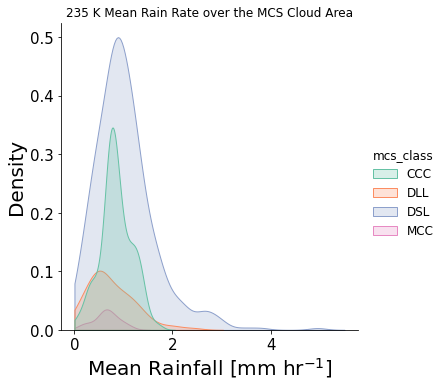

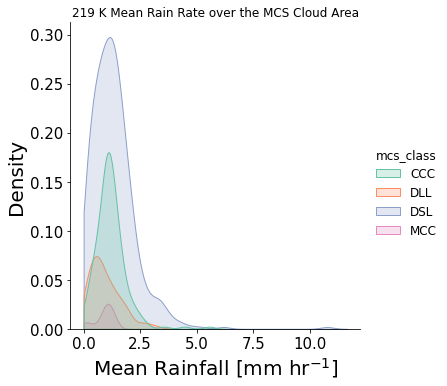

In [15]:
pal = "Set2"

with sns.plotting_context({"legend.fontsize": "large", "legend.title_fontsize": "large"}):
    sns.displot(mcs, x="mean_pr", hue="mcs_class", kind="kde",fill=True, palette=pal,clip=[mcs.mean_pr.min(),None])

ax = plt.gca()
ax.set_ylabel("Density", fontsize = 20)
ax.set_xlabel("Mean Rainfall [mm hr$^{-1}$]", fontsize = 20) #average over te MCS cloud area at diffrent times, not the mean rain rate for each CE
ax.tick_params(labelsize=15)
ax.set_title('235 K Mean Rain Rate over the MCS Cloud Area')
#ax.set_xlim([0, 8.5])
with sns.plotting_context({"legend.fontsize": "large", "legend.title_fontsize": "large"}):
    sns.displot(mcs, x="mean_pr219", hue="mcs_class", kind="kde",fill=True, palette=pal,clip=[mcs.mean_pr219.min(),None])

ax = plt.gca()
ax.set_ylabel("Density", fontsize = 20)
ax.set_xlabel("Mean Rainfall [mm hr$^{-1}$]", fontsize = 20) #average over te MCS cloud area at diffrent times, not the mean rain rate for each CE
ax.tick_params(labelsize=15)
ax.set_title('219 K Mean Rain Rate over the MCS Cloud Area')
#ax.set_xlim([0, 8.5])

In [6]:
mcs.mean_pr219.min()

5.545982947716346e-05

## Number of MCSs by Class 

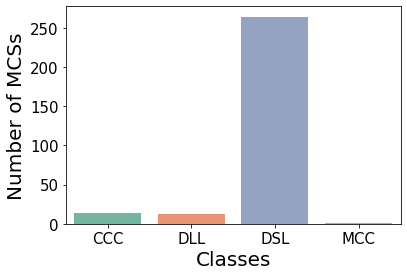

In [16]:
ax = sns.countplot(x="mcs_class", data=mcs_summary, palette=pal)
ax.set_xlabel("Classes", fontsize = 20)
ax.set_ylabel("Number of MCSs", fontsize = 20)
ax.tick_params(labelsize=15)

## Area Distributions 

Text(0, 0.5, 'MCSs Area [km$^2$]')

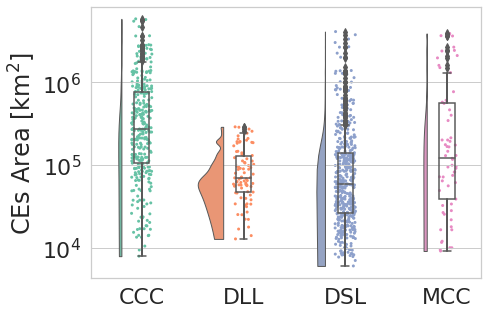

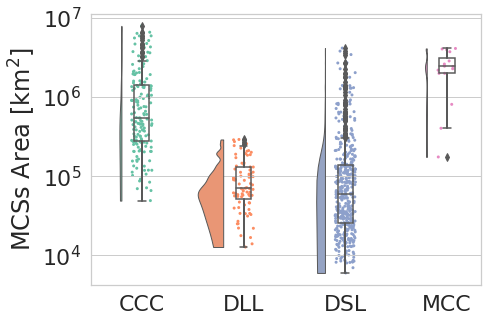

In [17]:
dx = list(ce["mcs_class"]); dy = list(ce["area_km2"]); ort = "v";
sns.set(style="whitegrid",font_scale=2)
f, ax = plt.subplots(figsize=(7, 5))
pt.RainCloud(x=dx,y=dy,data=ce, palette = pal, width_viol = .5, ax = ax, orient = ort, order= ["CCC","DLL","DSL","MCC"])
plt.yscale("log")
plt.ylabel('CEs Area [km$^2$]')


dx = list(mcs["mcs_class"]); dy = list(mcs["area_km2"]); ort = "v";
sns.set(style="whitegrid",font_scale=2)
f, ax = plt.subplots(figsize=(7, 5))
pt.RainCloud(x=dx,y=dy,data=mcs, palette = pal, width_viol = .5, ax = ax, orient = ort,order= ["CCC","DLL","DSL","MCC"])
plt.yscale("log")
plt.ylabel('MCSs Area [km$^2$]')

## MCSs Duration Distributions

In [18]:
c2 = mcs_summary[mcs_summary["mcs_class"].isin(["MCC", "CCC"])].copy()
c3 = mcs_summary[mcs_summary["mcs_class"].isin(["DLL", "DSL"])].copy()

c2.loc[:,"mcs_class"]= c2.mcs_class.astype("string")
c3.loc[:,"mcs_class"]= c3.mcs_class.astype("string")

(1.0, 65.0)

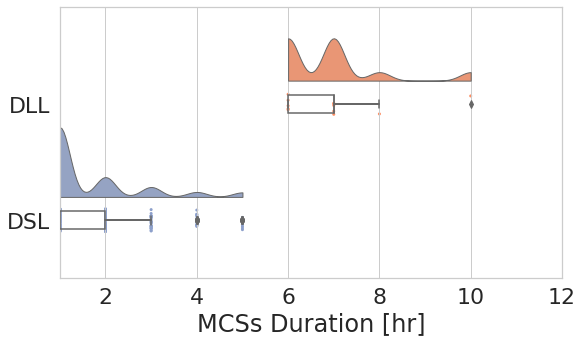

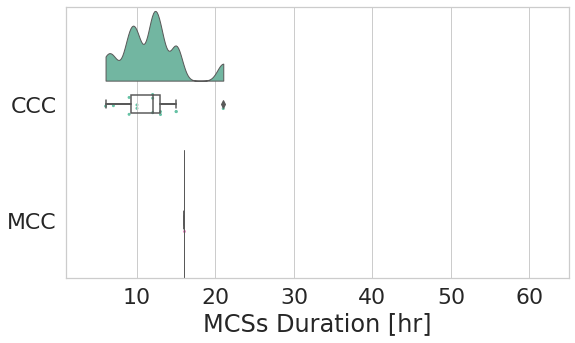

In [19]:
pali= [plt.cm.Set2.colors[1], plt.cm.Set2.colors[2]]

dx = list(c3["mcs_class"]); dy = list(c3.duration.dt.total_seconds()/3600); ort = "h"; 
sns.set(style="whitegrid",font_scale=2)
f, ax = plt.subplots(figsize=(9,5))
pt.RainCloud(x=dx,y=dy,data=c3, palette = pali, width_viol = 1.2, ax = ax, orient = ort, order= ["DLL","DSL"])
plt.xlabel('MCSs Duration [hr]')
plt.xlim([1,12])

pali= [plt.cm.Set2.colors[0], plt.cm.Set2.colors[3]]

dx = list(c2["mcs_class"]); dy = list(c2.duration.dt.total_seconds()/3600); ort = "h";
sns.set(style="whitegrid",font_scale=2)
f, ax = plt.subplots(figsize=(9,5))
pt.RainCloud(x=dx,y=dy,data=c2, palette =pali , width_viol = 1.2, ax = ax, orient = ort,order= ["CCC","MCC"])
#plt.xscale("log")
plt.xlabel('MCSs Duration [hr]')
plt.xlim([1,65])


## MCSs genesis and lysis location in maps

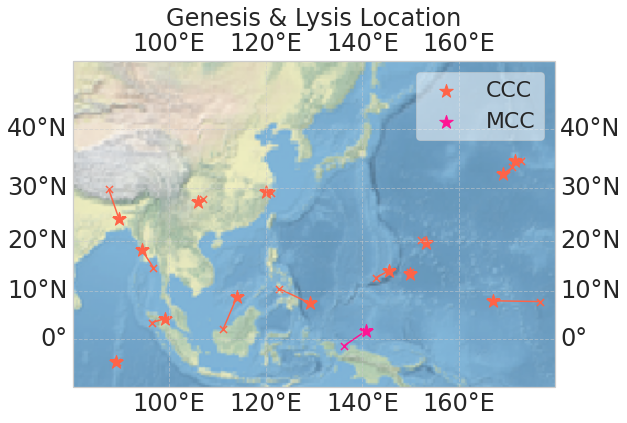

In [20]:
import cartopy.crs as ccrs
lon_min = ds.lon.min()
lon_max = ds.lon.max()
lat_min = ds.lat.min()
lat_max = ds.lat.max()

fig = plt.figure(figsize=(12, 6))

ax = plt.axes(projection=ccrs.Mercator())
ax.stock_img()   
colors = {"CCC": "tomato",  "MCC": "deeppink"}
for class_, g in c2.groupby("mcs_class"):
    color = colors.get(class_,"0.3")
    g.first_centroid.plot(marker="*",ax=ax, transform=ccrs.PlateCarree(), markersize=200, c=color,label=class_,)
    g.last_centroid.plot(marker="x",ax=ax, transform=ccrs.PlateCarree(), markersize=50, c=color)
    ax.plot([g.first_centroid.x, g.last_centroid.x],[g.first_centroid.y, g.last_centroid.y], linestyle='-',transform=ccrs.PlateCarree(),color=color) 
gridlines = ax.gridlines(draw_labels=True,alpha=0.5, linestyle='--')

plt.title('Genesis & Lysis Location')
plt.legend(framealpha=0.5)

extent = [lon_min, lon_max, lat_min, lat_max]
ax.set_extent(extent, crs=ccrs.PlateCarree())

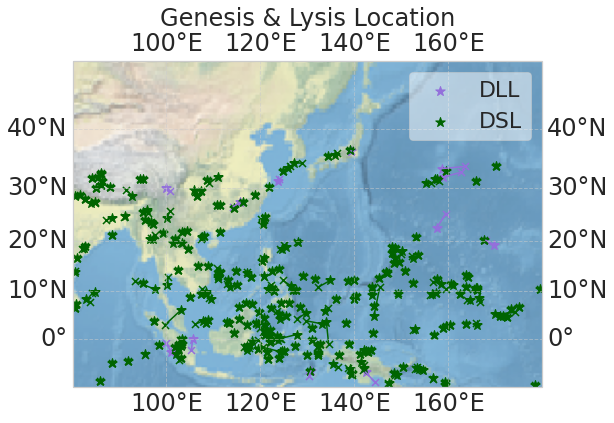

In [21]:
fig = plt.figure(figsize=(12, 6))
ax = plt.axes(projection=ccrs.Mercator())
ax.stock_img()   
colors = {"DSL": "darkgreen",  "DLL": "mediumpurple"}
for class_, g in c3.groupby("mcs_class"):
    color = colors.get(class_,"0.3")
    g.first_centroid.plot(marker="*",ax=ax, transform=ccrs.PlateCarree(), markersize=100, c=color,label=class_,)
    g.last_centroid.plot(marker="x",ax=ax, transform=ccrs.PlateCarree(), markersize=50, c=color)
    ax.plot([g.first_centroid.x, g.last_centroid.x],[g.first_centroid.y, g.last_centroid.y], linestyle='-',transform=ccrs.PlateCarree(),color=color) 
gridlines = ax.gridlines(draw_labels=True,alpha=0.5, linestyle='--')

plt.title('Genesis & Lysis Location')
plt.legend(framealpha=0.5)

extent = [lon_min, lon_max, lat_min, lat_max]
ax.set_extent(extent, crs=ccrs.PlateCarree())

## MCS frequency density

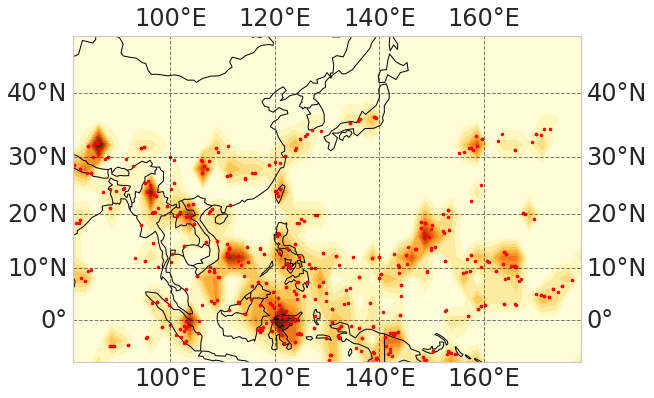

In [22]:
import cartopy.feature as cfeature
c4 = mcs_summary[mcs_summary["mcs_class"].isin(["DLL", "DSL","MCC","CCC"])].copy()
# nx,ny = 772,772  # for lat : (40 + 5)/.25 (30 km resolution)
nx, ny = 40, 15 #50, 25
lon_bins = np.linspace(lon_min, lon_max, nx+1)
lat_bins = np.linspace(lat_min, lat_max, ny+1)
lonc = (lon_bins[1:] + lon_bins[:-1]) / 2
latc = (lat_bins[1:] + lat_bins[:-1]) / 2

x=[]
y=[]
for class_, g in c4.groupby("mcs_class"):
    color = colors.get(class_,"0.3")
    x.append(np.concatenate((g.first_centroid.x, g.last_centroid.x)))
    y.append(np.concatenate((g.first_centroid.y, g.last_centroid.y)))
    
    
fig = plt.figure(figsize=(12, 6))
ax = plt.axes(projection=ccrs.Mercator())
    
density, _, _ = np.histogram2d(np.concatenate(x), np.concatenate(y), [lon_bins,lat_bins])
    #density[density == 0] = np.nan
    
ax.contourf(lonc, latc, density.T, alpha=1, levels=20, cmap='YlOrBr', transform=ccrs.PlateCarree(), vmin=0, vmax=10)   
ax.plot(np.concatenate(x),np.concatenate(y),marker="o", markersize=2.5, c='red', ls="none",markerfacecolor='red', transform=ccrs.PlateCarree())
gridlines = ax.gridlines(draw_labels=True,alpha=0.5, linestyle='--',color='black')
ax.add_feature(cfeature.BORDERS, edgecolor ='black')
ax.add_feature(cfeature.COASTLINE, edgecolor ='black')
ax.add_feature(cfeature.LAND, edgecolor ='black')
#plt.title(class_,)
extent = [lonc[0], lonc[-1], latc[0], latc[-1]]
ax.set_extent(extent, crs=ccrs.PlateCarree())

## add label and colormap 

## Tracks on BT on Rain rate 

masking
plotting masked
plotting tracks


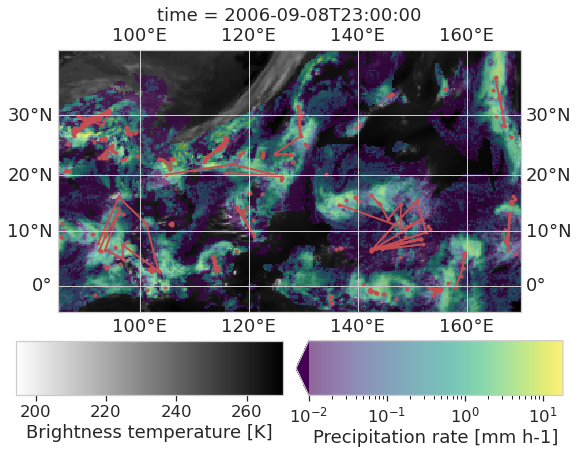

In [162]:
# CTT movie -- WIP
sns.set(style="whitegrid",font_scale=1.5)
import cartopy.crs as ccrs
import geopandas as gpd
import matplotlib as mpl
import regionmask

i = 10  # select time
ce["geometry"] = ce.cs235
cs = ce.set_geometry("geometry")
size = 5
cx = cy = 1

pr_ = ds.pr.isel(time=i)
tb_ = ds.ctt.isel(time=i)
if cx > 1 or cy > 1:
    tb_ = tb_.coarsen(x=cx, y=cy, boundary="trim").mean()

x0, x1 = tb_.lon.values.min(), tb_.lon.values.max()
y0, y1 = tb_.lat.values.min(), tb_.lat.values.max()

aspect = (x1 - x0) / (y1 - y0)
proj = ccrs.Mercator()
tran = ccrs.PlateCarree()

fig = plt.figure(figsize=(size * aspect, size + 1))
gs = fig.add_gridspec(
    2, 2,
    width_ratios=(1, 1), height_ratios=(aspect * 2 + 1, 1),
    left=0.1, right=0.9, bottom=0.1, top=0.9,
    wspace=0.05, hspace=0.18,
)

ax = fig.add_subplot(gs[0, :], projection=proj)
ax.set_extent([x0, x1, y0, y1], crs=tran)
ax.gridlines(draw_labels=True)

ax2 = fig.add_subplot(gs[1, 0])
ax3 = fig.add_subplot(gs[1, 1])

# Background -- CTT
tb_.plot(
    x="lon", y="lat",
    cmap="gray_r", ax=ax, cbar_ax=ax2,
    transform=tran,
    cbar_kwargs=dict(orientation="horizontal"),
)

# CEs with colored precip
shapes = cs[["geometry"]]
regions = regionmask.from_geopandas(shapes)
print("masking")
mask = regions.mask(pr_)
masked = pr_.where(mask >= 0)
print("plotting masked")
masked.plot.pcolormesh(
    x="lon", y="lat",
    ax=ax, cbar_ax=ax3, transform=tran, alpha=0.6,
    cbar_kwargs=dict(orientation="horizontal"),
    norm=mpl.colors.LogNorm(vmin=1e-2, vmax=None),
)

# Tracks up to this time
print("plotting tracks")
t = tb_.time.values
assert np.isscalar(t)
for _, g in cs.groupby("mcs_id"):
    g_ = g[g.time <= t]
    c = g_.to_crs("EPSG:32663").centroid.to_crs("EPSG:4326")
    ax.plot(c.x, c.y, ".-", c="r", lw=2, transform=tran)

## Plotting MCS density with specs for website

In [26]:
# ------- load necessary modules ------- #
import xarray as xr
import numpy as np
import glob
from datetime import datetime
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import cartopy.crs as ccrs
from cartopy.mpl.geoaxes import GeoAxes
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
import cartopy.feature as cfeature
from os.path import exists
import argparse

# ------- trick to read function in a separate file ------- #
import sys
sys.path.append('/glade/u/home/rberrios/python/PRECIP/')
from defineColormaps import *

### wpac

/glade/scratch/knocasio/ipykernel_284493/4061160396.py:60: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  cb = plt.colorbar(plotCnt,ax=current_ax,shrink=0.5)


Text(0.5, 1.0, 'Frequency of the MCSs positions')

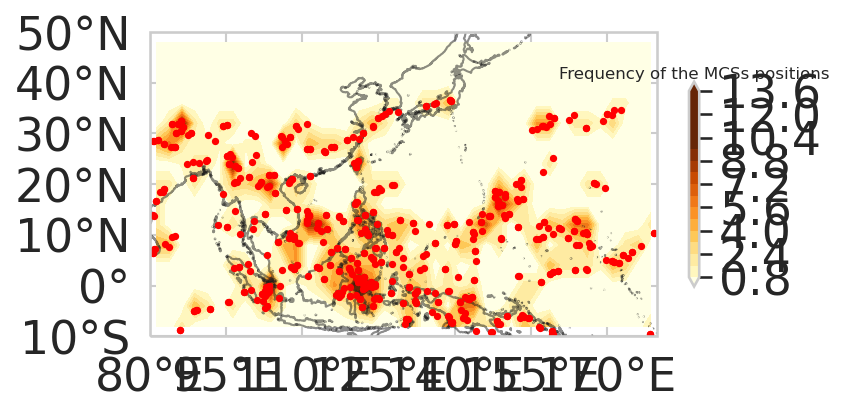

In [28]:
domain = "wpac"
minLat = -10
maxLat =  50.01
minLon = 80
maxLon = 180.0
centerLon = 0
lat_interval=10
lon_interval=15
inc = 25 #for wind barbs
length = 3 #for wind barbs

##### To calculate MCS density #######
c4 = mcs_summary[mcs_summary["mcs_class"].isin(["DLL", "DSL","MCC","CCC"])].copy()
nx, ny = 40, 15 
lon_bins = np.linspace(minLon, maxLon, nx+1)
lat_bins = np.linspace(minLat, maxLat, ny+1)
lonc = (lon_bins[1:] + lon_bins[:-1]) / 2
latc = (lat_bins[1:] + lat_bins[:-1]) / 2

x=[]
y=[]
for class_, g in c4.groupby("mcs_class"):
    color = colors.get(class_,"0.3")
    x.append(np.concatenate((g.first_centroid.x, g.last_centroid.x)))
    y.append(np.concatenate((g.first_centroid.y, g.last_centroid.y)))

density, _, _ = np.histogram2d(np.concatenate(x), np.concatenate(y), [lon_bins,lat_bins])

###### Plot Data ######
# Open Figure
projection = ccrs.PlateCarree(central_longitude=centerLon)
fig, ax = plt.subplots(dpi=150, facecolor='w', edgecolor='k')
fig.tight_layout()

current_ax=plt.subplot(projection=projection)
current_ax.set_extent([minLon, maxLon, minLat, maxLat], crs=projection) 

 # Add Latitudes
current_ax.set_yticks(np.arange(minLat, maxLat, lat_interval), crs=projection)
lat_formatter = LatitudeFormatter()
current_ax.yaxis.set_major_formatter(lat_formatter)

# Add Longitudes
current_ax.set_xticks(np.arange(minLon, maxLon, lon_interval), crs=projection)
lon_formatter = LongitudeFormatter(zero_direction_label=True)
current_ax.xaxis.set_major_formatter(lon_formatter)


cmap ='YlOrBr'
cnLevels = 20 
landColor = 'k'


plotCnt = current_ax.contourf(lonc, latc, density.T,alpha=1,transform=projection,levels=cnLevels,extend='both',cmap=cmap, vmin=0, vmax=10)
current_ax.plot(np.concatenate(x),np.concatenate(y),marker="o", markersize=2.5, c='red', ls="none",markerfacecolor='red', transform=ccrs.PlateCarree())

current_ax.add_feature(cfeature.COASTLINE.with_scale('10m'),alpha=0.5,edgecolor=landColor)

#add colormap
cb = plt.colorbar(plotCnt,ax=current_ax,shrink=0.5)
cb.ax.set_title('Frequency of the MCSs positions',fontsize=8)

